# Exploratory Data Analysis (EDA)
## Overview of Missing Values
### Plot
In this first exploratory step, we analyze the percentage of missing values across all variables in the final dataset.

Plot shows the percentage of missing values for each feature in the dataset, sorted in descending order. The highest bar (up to 100%) indicates completely missing features for a substantial proportion of patients. A graph like this is important because a high incidence of NaN compromises statistical integrity and can lead to unstable models. In addition, many clinical variables are detected only in specific subgroups of patients (e.g., in severe disease), which introduces missing not at random (MNAR). 

In [107]:
# === Essential Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

EXPORT_PATH = "../data/processed/"
ASSETS_PATH = "../assets/plots/eda/"

# === Plot Style ===
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
def plot_histogram(
    data, column, bins=30, kde=True, figsize=(10, 4), 
    title=None, xlabel=None, ylabel="Number of Patients", 
    save_path=None
):
    plt.figure(figsize=figsize)
    sns.histplot(data[column], bins=bins, kde=kde)
    plt.title(title if title else f"{column} Distribution")
    plt.xlabel(xlabel if xlabel else column)
    plt.ylabel(ylabel)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

In [108]:
# === Load dataset ===
df_final = pd.read_csv(EXPORT_PATH + "df_model_ready.csv")

# === Confirm structure ===
print(df_final.shape)
df_final.head()
df_final.columns

(3685, 92)


Index(['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'AGE', 'GENDER',
       'ADMISSION_TYPE', 'ADMISSION_LOCATION', 'INSURANCE', 'FIRST_CAREUNIT',
       'LOS', 'HOSPITAL_EXPIRE_FLAG', 'INTIME', 'mean_Glucose_x',
       'mean_HeartRate', 'mean_MeanBP', 'mean_RespRate', 'mean_SpO2',
       'mean_Temperature', 'std_Glucose_x', 'std_HeartRate', 'std_MeanBP',
       'std_RespRate', 'std_SpO2', 'std_Temperature', 'min_Glucose_x',
       'min_HeartRate', 'min_MeanBP', 'min_RespRate', 'min_SpO2',
       'min_Temperature', 'max_Glucose_x', 'max_HeartRate', 'max_MeanBP',
       'max_RespRate', 'max_SpO2', 'max_Temperature', 'mean_Creatinine',
       'mean_Glucose_y', 'mean_Hemoglobin', 'mean_Lactate', 'mean_PT',
       'mean_PTT', 'mean_Platelet Count', 'mean_Potassium', 'mean_Sodium',
       'mean_WBC', 'std_Creatinine', 'std_Glucose_y', 'std_Hemoglobin',
       'std_Lactate', 'std_PT', 'std_PTT', 'std_Platelet Count',
       'std_Potassium', 'std_Sodium', 'std_WBC', 'min_Creatinine',
       'min_Gl

## Descriptive Overview
This first block prints summary statistics for all numeric variables in the df_final dataframe by invoking the describe() method and transposing the output for improved readability. The summary includes count, mean, standard deviation, minimum, quartiles, and maximum for each variable. Such descriptive statistics provide a quantitative overview of the dataset, enabling the identification of central tendencies, dispersion, and potential anomalies or outliers. This step is crucial in the context of exploratory data analysis, as it informs subsequent data cleaning, normalization, and feature engineering decisions, thereby ensuring the integrity and reliability of downstream modeling efforts.

Output displays the overall structure of the final dataset used to analyze ICU patients with sepsis. It includes 3685 unique ICU admissions and 52 variables, covering both static attributes such as age, gender, and admission type, as well as dynamic features derived from vital signs recorded during the first 24 hours. Descriptive statistics indicate an elderly cohort, with a mean age of 68 years, and an average ICU stay of approximately 5.7 days. However, some extreme values—such as heart rates or systolic blood pressures exceeding 900 or 2000, respectively—highlight the presence of outliers, possibly due to recording errors, which should be addressed in future steps. Categorical variables confirm a predominance of emergency admissions and a balanced gender distribution. Furthermore, nearly half of the patients lack complete vital sign data, as reflected in the _MISSING flags, which have been retained to track data availability. This data profile suggests that before modeling, we must further explore the clinical significance of demographic patterns and missing data behavior.

In [109]:
print("\n[INFO] Summary statistics for numeric variables:")
display(df_final.describe().T)


[INFO] Summary statistics for numeric variables:


,count,mean,std,min,25%,50%,75%,max
SUBJECT_ID,3685.0,38042.643691,29519.241245,3.0000,13934.0000,27748.0000,62871.000,99985.0000
HADM_ID,3685.0,149043.439077,29176.674824,100074.0000,123675.0000,148651.0000,175213.000,199943.0000
ICUSTAY_ID,3685.0,250221.804885,28861.797019,200003.0000,225602.0000,250364.0000,275615.000,299950.0000
AGE,3685.0,87.938399,69.926192,0.0000,58.0000,70.0000,81.000,310.0000
LOS,3685.0,5.744356,7.677370,0.0079,1.7219,3.0194,6.602,97.2972
...,...,...,...,...,...,...,...,...
Output_Stool_24h,3479.0,42.105203,226.563148,-1.0000,0.0000,0.0000,0.000,4000.0000
Output_Urine_24h,3479.0,730.492958,1189.216569,0.0000,0.0000,0.0000,1169.500,14355.0000
NUM_COMORBIDITIES_x,3685.0,16.178833,7.141108,2.0000,11.0000,15.0000,20.000,38.0000
NUM_COMORBIDITIES_y,3685.0,16.178833,7.141108,2.0000,11.0000,15.0000,20.000,38.0000


## Demographic Analysis
### Age Distributions
Histogram about age distribution shows that most patients are aged 50–80. The spike at 91 is due to HIPAA privacy masking for those >89. Age is highly predictive for mortality and clinical severity and artificial 91-year spike could distort clustering; extreme values <20 or >100 (if present) should be validated. So, normalize age or encode AGE > 89 as a binary feature to reduce distortion.

Plot illustrates the distribution of patient age, clearly revealing two distinct groups. Most patients fall within the 50–80 year range, as expected for an ICU population with sepsis. The distribution is left-skewed, with a modal peak around 70 years.
This anomaly is an artifact resulting from HIPAA-compliant anonymization in the MIMIC-III dataset. Patients older than 89 years are assigned fictitious dates of birth, often projected into the future (e.g., the year 3000), which—if uncorrected—leads to artificially inflated age values exceeding 300 years.
The presence of this artificial spike distorts both the mean and variance of the age variable, rendering it unsuitable for direct use in statistical analyses. A correction is therefore required, either by: subtracting 210 years to rescale the values into a realistic range, or truncating all such values to 90 years.

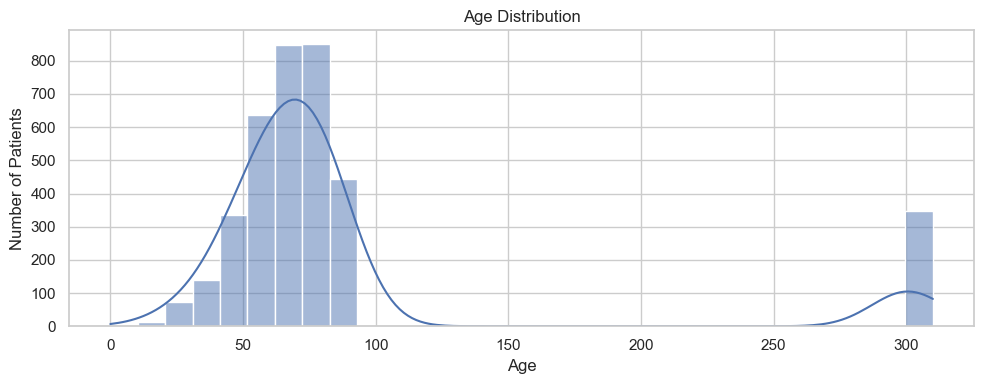

In [110]:
plot_histogram(
    data=df_final, 
    column="AGE", 
    bins=30, 
    title="Age Distribution", 
    xlabel="Age", 
    save_path=ASSETS_PATH + "age_distribution.png"
)

In [111]:
df_final['age_censored'] = (df_final['AGE'] == 90).astype(int)

### Gender Distributions

In the second plot, the gender distribution shows a slight predominance of male patients compared to females. The difference is not dramatic, but it is statistically meaningful and consistent with clinical evidence, where sepsis tends to occur slightly more frequently in men, particularly among older age groups. This insight will be important for evaluating potential interactions between gender and other predictive variables, such as in stratified analysis or through interaction terms in predictive modeling.

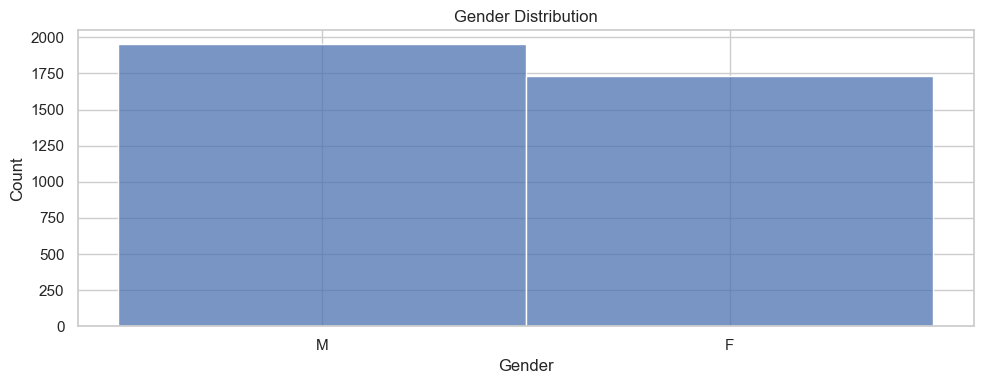

In [112]:
plot_histogram(
    data=df_final, 
    column="GENDER", 
    bins=len(df_final["GENDER"].unique()), 
    kde=False, 
    title="Gender Distribution", 
    xlabel="Gender", 
    ylabel="Count", 
    save_path=ASSETS_PATH + "gender_distribution.png"
)


## LOS Analysis

In this step, we visualized the full distribution of the ICU Length of Stay (LOS) variable for the study cohort. Using Seaborn’s histplot function, we generated a histogram with kernel density estimation to display the frequency of patients across different LOS durations. The x-axis represents the number of days spent in the ICU, while the y-axis indicates the corresponding patient count. The plot reveals a pronounced right-skewed distribution, with the majority of patients experiencing short ICU stays (1–5 days) and a long tail extending to extreme values, including outliers exceeding 60 or 80 days. This visualization highlights the non-normal nature of the LOS variable and underscores the need for robust statistical modeling approaches, such as log transformation or outlier-resistant regression techniques, to account for the observed skewness and extreme values. The figure was saved to the designated assets directory to ensure reproducibility and facilitate subsequent analysis.

As evidenced by the quantile analysis, 99% of patients exhibit a length of stay (LOS) of ≤ 51 days, which appears clinically reasonable. However, to prevent the small fraction of outlier values from distorting the statistical representation of the data and adversely affecting the performance of predictive models, a logarithmic transformation of the LOS variable is applied. Specifically, a log1p transformation is employed, which calculates log(1 + x). This transformation is particularly appropriate for data that may include zeros, as it maintains the non-negativity of the original values.

> It is important to note that, in any case, the total number of outliers exceeding the 60-day threshold is limited to 44 patients. This corresponds to a marginal proportion of the overall cohort, accounting for less than 0.5% of the total sample size. So, from a practical standpoint, it is therefore not necessary to remove the outliers from the dataset. However, it is essential to keep track of observations with a length of stay exceeding 60 days during the interpretation phase. Additionally, predictive performance should be evaluated both with and without these extreme cases, in order to assess the model’s sensitivity to such observations.

This dual approach allows for a more comprehensive understanding of the robustness and generalizability of the predictive framework, particularly in the presence of clinically rare but potentially influential data points.

The use of log1p improves the symmetry of the LOS distribution, making it more suitable for statistical modeling by compressing the long right tail and mitigating the influence of extreme values. As a result, this approach enhances the robustness and generalizability of downstream machine learning models while preserving the interpretability of the transformed variable.

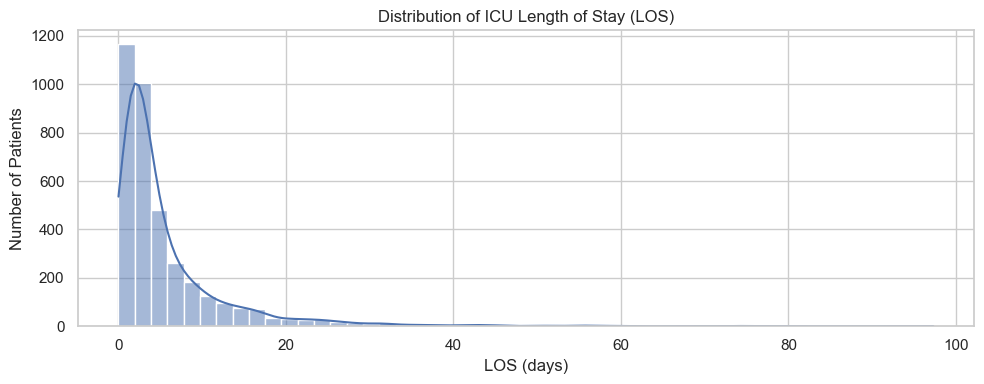

Outliers: 7
90° percentile: 13.71 days
99° percentile: 37.41 days
Max LOS: 97.30 days


In [113]:
plot_histogram(
    data=df_final,
    column="LOS",
    bins=50,
    title="Distribution of ICU Length of Stay (LOS)",
    xlabel="LOS (days)",
    save_path=ASSETS_PATH + "los_distribution.png"
)

q90 = df_final['LOS'].quantile(0.90)
q99 = df_final['LOS'].quantile(0.99)
max_los = df_final['LOS'].max()

print(f'Outliers: {df_final[(df_final.LOS>60)].shape[0]}')
print(f"90° percentile: {q90:.2f} days")
print(f"99° percentile: {q99:.2f} days")
print(f"Max LOS: {max_los:.2f} days")

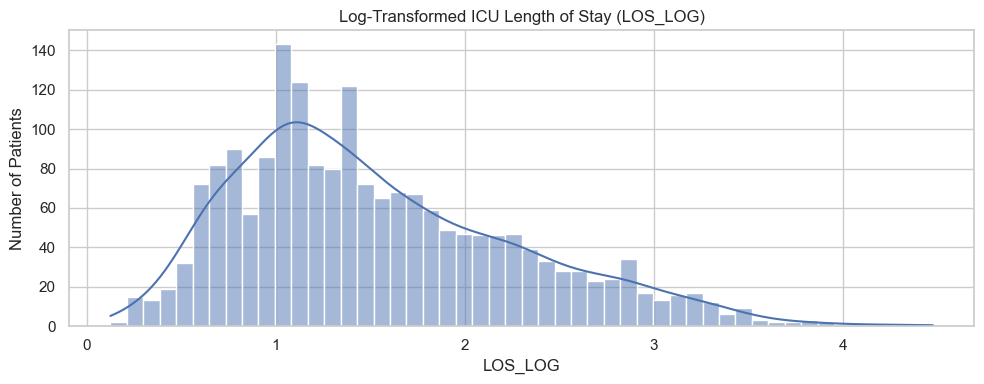

In [132]:
var = 'LOS_LOG'
df_final[var] = np.log1p(df_final['LOS'])

plot_histogram(
    data=df_final,
    column=var,
    bins=50,
    title="Log-Transformed ICU Length of Stay (LOS_LOG)",
    xlabel="LOS_LOG",
    save_path=ASSETS_PATH + "los_log_distribution.png"
)

The distribution observed after the logarithmic transformation of LOS using the log1p function appears substantially more symmetric compared to the original distribution. The modal peak is now centered around values between 1.0 and 1.5, corresponding to a length of stay of approximately 1–3 days. While a right-skewed tail is still present, it is markedly reduced, indicating a clear attenuation of the influence of extreme outliers.

These results confirm that the logarithmic transformation has enhanced the normality and statistical stability of the LOS variable. Clinically rare outliers remain detectable but no longer exert a disproportionate effect on the scale or the mean of the distribution. 
The newly derived variable, LOS_LOG, is therefore suitably conditioned for use in predictive modeling frameworks.

## Vital Sign Distributions
### Heart Rate
#### Mean Heart Rate Distributions

Histogram displays the distribution of `mean_HeartRate`, the average heart rate recorded for each patient in the first 24 hours of ICU stay. The KDE overlay estimates the probability density. Values range from roughly 50 to 140 bpm with a bell-shaped curve centered around 85–90 bpm. Heart rate is a fundamental marker of hemodynamic status. A symmetric and physiologically plausible distribution suggests clean and usable data. This feature likely has strong predictive power, especially for adverse events and LOS.

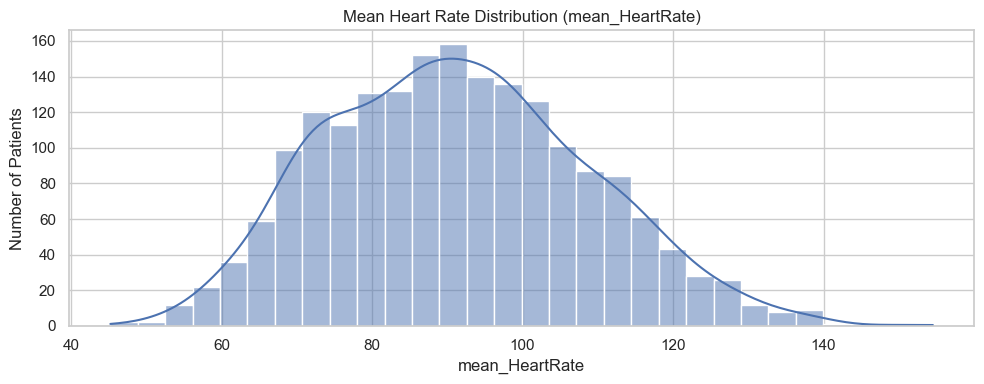

In [114]:
plot_histogram(
    data=df_final,
    column="mean_HeartRate",
    bins=30,
    title="Mean Heart Rate Distribution (mean_HeartRate)",
    xlabel="mean_HeartRate",
    save_path=ASSETS_PATH + "mean_HeartRate_distribution.png"
)

#### STD Heart Rate Distributions
Variable `std_HeartRate` represents the standard deviation of heart rate measurements for each patient during their stay in the Intensive Care Unit (ICU). In simple terms, it quantifies how much a patient's heart rate fluctuates over time.

According to clinical literature and medical experience, the physiological range of heart rate variability for critically ill but hemodynamically stable patients typically lies between 5 and 20 beats per minute (bpm). Through quantile analysis of our dataset, we identified a threshold value of 20.48 bpm, which supports this clinical expectation. 
Consequently, values exceeding 20.48 bpm can be considered statistical outliers, potentially indicative of atypical or unstable cardiovascular dynamics.

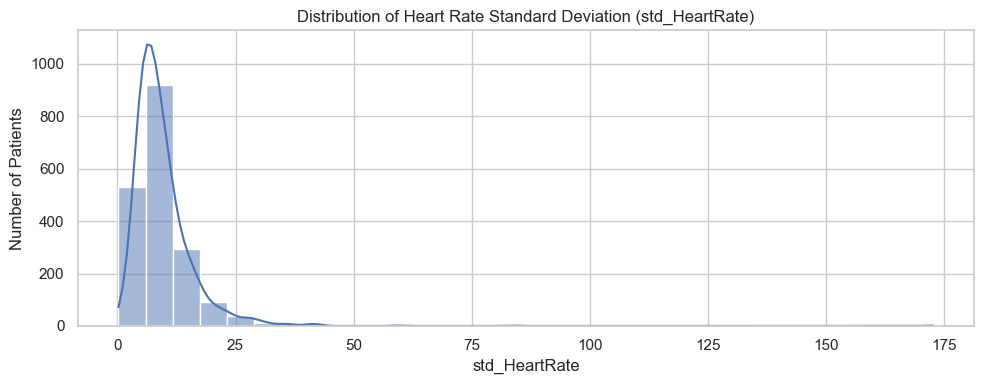

In [115]:
plot_histogram(
    data=df_final,
    column="std_HeartRate",
    bins=30,
    title="Distribution of Heart Rate Standard Deviation (std_HeartRate)",
    xlabel="std_HeartRate",
    save_path=ASSETS_PATH + "std_HeartRate_distribution.png"
)

#### Min Heart Rate Distributions
Curve approximates a Gaussian-like distribution, with noticeable peaks at both tails that warrant further attention. The modal value falls within the 70–75 bpm range, which is consistent with normal human physiology. Most values are concentrated between 50 and 100 bpm, a range generally associated with clinically stable or mildly unstable conditions.

Notably, a few extreme cases are observed. These include values below 30 bpm—potentially indicative of critical bradycardia or, alternatively, recording errors—and values exceeding 120 bpm, which, while rare, are physiologically plausible in patients experiencing tachycardia or circulatory shock.

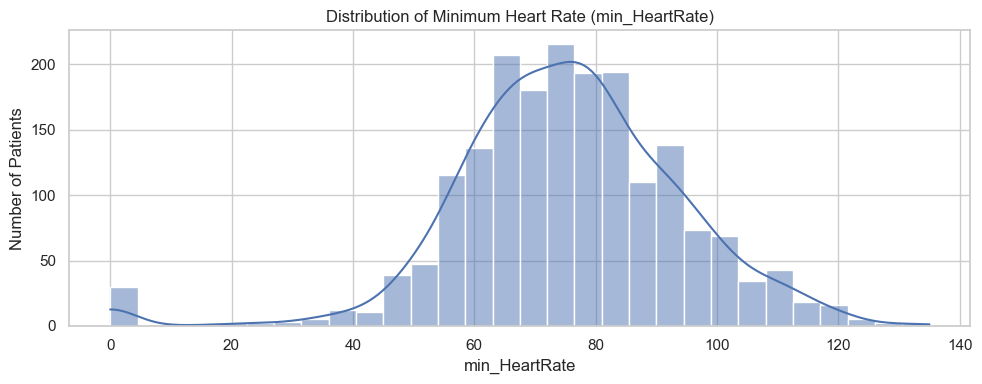

In [116]:
plot_histogram(
    data=df_final,
    column="min_HeartRate",
    bins=30,
    title="Distribution of Minimum Heart Rate (min_HeartRate)",
    xlabel="min_HeartRate",
    save_path=ASSETS_PATH + "min_HeartRate_distribution.png"
)

#### Max Heart Rate Distributions

Distribution of maximum heart rate (max_HeartRate) among ICU patients is strongly right-skewed, indicating the presence of extreme outliers or potential recording errors. The modal peak is located between 100 and 140 bpm, which is consistent with common clinical conditions such as fever, sepsis, pain, or agitation. Most values are concentrated below 180 bpm, and values exceeding 200 bpm—though rare—remain clinically plausible in severe cases. However, values above 300 bpm are physiologically implausible and likely represent measurement errors or artifacts. Given their extremely low frequency, we opted to remove these records from the dataset to ensure data quality without significantly affecting sample size or representativeness.

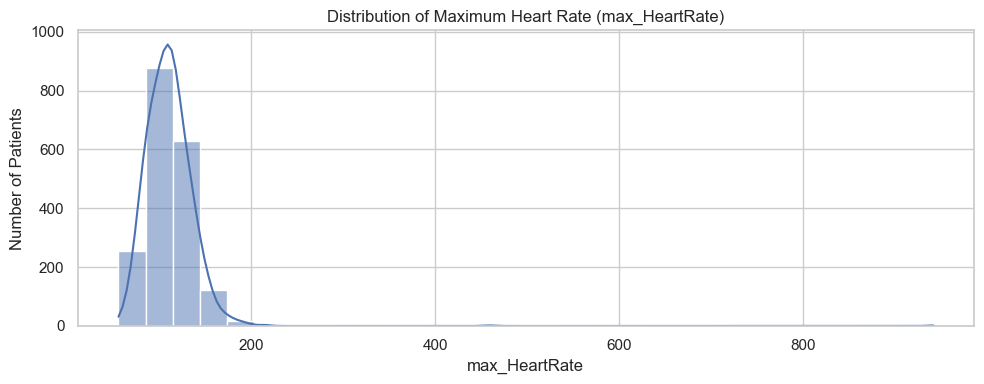

MAX HR > 250 bpm: 2
MAX HR > 250 bpm: 0


In [117]:
plot_histogram(
    data=df_final,
    column="max_HeartRate",
    bins=30,
    title="Distribution of Maximum Heart Rate (max_HeartRate)",
    xlabel="max_HeartRate",
    save_path=ASSETS_PATH + "max_HeartRate_distribution.png"
)

var = 'max_HeartRate'
out = df_final[df_final[var] > 250]
print(f"MAX HR > 250 bpm: {len(out)}")

df_final = df_final[df_final['max_HeartRate'] <= 250]
out = df_final[df_final['max_HeartRate'] > 250]
print(f"MAX HR > 250 bpm: {len(out)}")

## Laboratory Biomarkers
### Creatinine
#### Mean Creatinine Distributions

Next, plot displays the distribution of mean creatinine levels among ICU patients. The distribution is markedly right-skewed, as expected for a clinical variable sensitive to organ dysfunction. Most values are concentrated between 0.5 and 2.0 mg/dL, which aligns with a range indicative of normal renal function (typically 0.6–1.2 mg/dL) and mild renal impairment (up to 2.0 mg/dL).

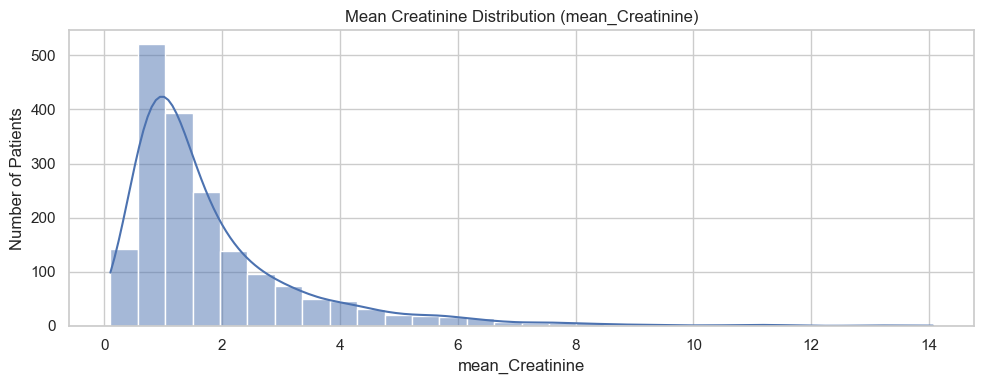

MEAN Creatinine > 15 mg/dL: 0


In [118]:
plot_histogram(
    data=df_final,
    column="mean_Creatinine",
    bins=30,
    title="Mean Creatinine Distribution (mean_Creatinine)",
    xlabel="mean_Creatinine",
    save_path=ASSETS_PATH + "mean_Creatinine_distribution.png"
)

high_creatinine = df_final[df_final['mean_Creatinine'] > 15]
print(f"MEAN Creatinine > 15 mg/dL: {len(high_creatinine)}")

#### STD Creatinine Distributions

Creatinine standard deviation (std_Creatinine) among ICU patients displays a distribution that's markedly right-skewed, with the majority of values concentrated near zero and a long tail extending up to approximately 3.5 mg/dL. The mode is observed below 0.2 mg/dL, indicating that creatinine levels remained stable over time for a large proportion of patients.

Values exeeding 1.0 mg/dL suggest significant renal instability or rapid clinical deterioration/improvement. Although values above 2.5 mg/dL are rare and should be assessed for clinical plausibility or potential measurement errors, their frequency is too low to substantially impact the overall distribution. Therefore, we opt to retain these observations without exclusion.

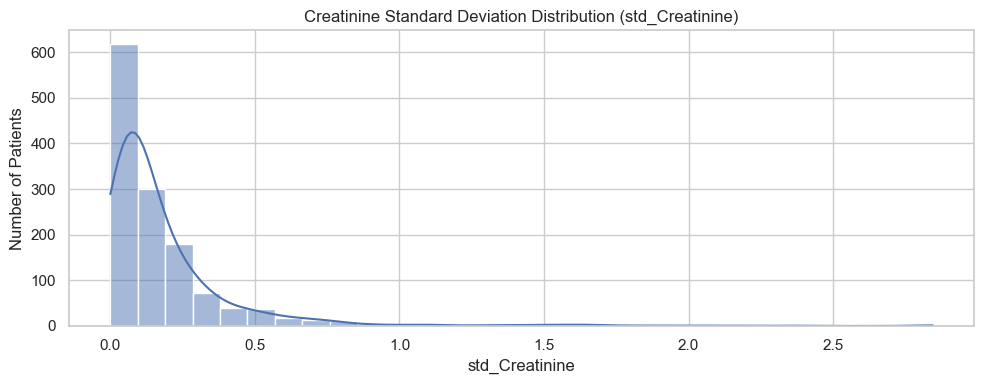

STD Creatinine > 2.5 mg/dL: 2


In [119]:
plot_histogram(
    data=df_final,
    column="std_Creatinine",
    bins=30,
    title="Creatinine Standard Deviation Distribution (std_Creatinine)",
    xlabel="std_Creatinine",
    save_path=ASSETS_PATH + "std_Creatinine_distribution.png"
)

outliers_std_creat = df_final[df_final['std_Creatinine'] > 2.5]
print(f"STD Creatinine > 2.5 mg/dL: {len(outliers_std_creat)}")

#### Min Creatinine Distributions

Plot shows a right-skewed distribution, which is typical of clinical biomarkers that reflect organ dysfunction. Creatinine is a waste product of muscle metabolism eliminated by the kidneys; therefore, low values are physiologically normal, while elevated levels are typically pathological.

Most patients exhibit minimum creatinine levels between 0.5 and 2.0 mg/dL. Some minimum values exceeding 10 mg/dL are clinically improbable; these may reflect cases where no renal improvement occurred during the observation period, technical errors, or statistical outliers.

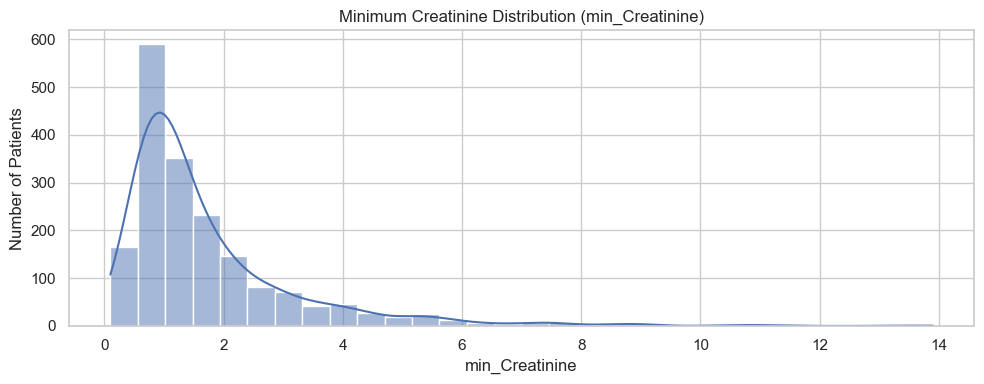

Pazienti con min_Creatinine > 10 mg/dL: 7


In [120]:
plot_histogram(
    data=df_final,
    column="min_Creatinine",
    bins=30,
    title="Minimum Creatinine Distribution (min_Creatinine)",
    xlabel="min_Creatinine",
    save_path=ASSETS_PATH + "min_Creatinine_distribution.png"
)
extreme_min_creat = df_final[df_final['min_Creatinine'] > 10]
print(f"Pazienti con min_Creatinine > 10 mg/dL: {len(extreme_min_creat)}")

#### Max Creatinine Distributions

Graph displays the distribution of maximum creatinine levels per patient, showing a markedly right-skewed pattern with a long tail extending beyond 20 mg/dL. Most values are concentrated between 0.5 and 4.0 mg/dL, representing physiologically normal or mildly elevated levels.

Creatinine values exceeding 10 mg/dL are uncommon but clinically plausible, especially in severe or borderline cases of acute or chronic kidney dysfunction. These observations, although extreme, are considered valid and do not require removal.

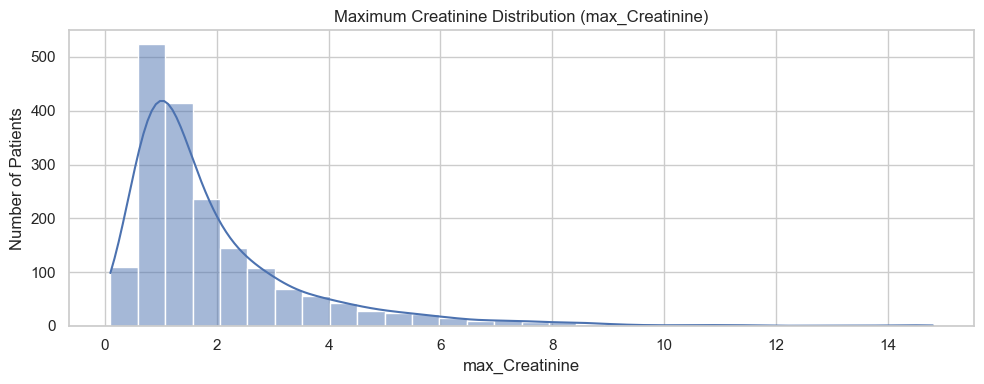

max_Creatinine > 15 mg/dL: 0


In [121]:
plot_histogram(
    data=df_final,
    column="max_Creatinine",
    bins=30,
    title="Maximum Creatinine Distribution (max_Creatinine)",
    xlabel="max_Creatinine",
    save_path=ASSETS_PATH + "max_Creatinine_distribution.png"
)
extreme_max_creat = df_final[df_final['max_Creatinine'] > 15]
print(f"max_Creatinine > 15 mg/dL: {len(extreme_max_creat)}")

## Number of Comorbidities
Finally, we presents the distribution of the number of comorbidities per patient with sepsis. The distribution is right-skewed, though not excessively, and suggests a cohort characterized by multiple clinical comorbidities. A long right tail is observed, with some patients presenting up to 38 recorded comorbidities.

The presence of numerous comorbidities is common among ICU patients, particularly in cases of sepsis. Each secondary ICD-9 diagnosis may reflect a pre-existing chronic condition, a complication, or an associated clinical state. Patients with more than 30 comorbidities may exhibit increased clinical complexity; however, it is also important to verify that these are not the result of redundant or overlapping diagnostic codes.

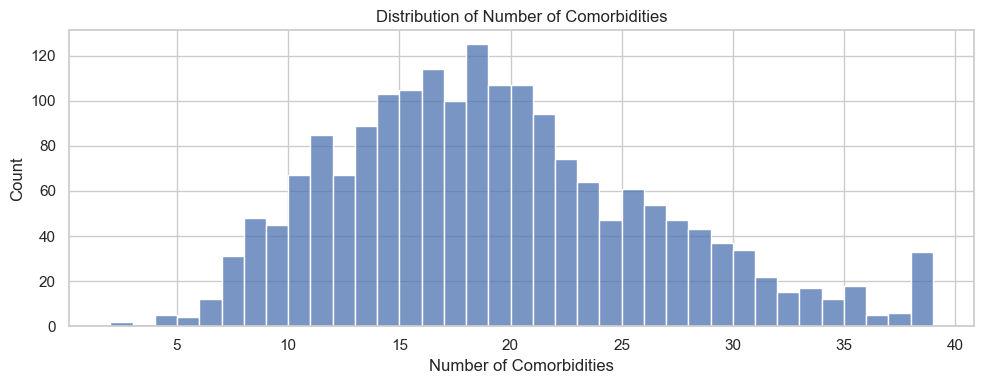

In [122]:
plot_histogram(
    data=df_final,
    column="NUM_COMORBIDITIES",
    bins=range(int(df_final["NUM_COMORBIDITIES"].min()), int(df_final["NUM_COMORBIDITIES"].max()) + 2),
    kde=False,
    title="Distribution of Number of Comorbidities",
    xlabel="Number of Comorbidities",
    ylabel="Count",
    save_path=ASSETS_PATH + "num_comorbidities_distribution.png"
)

To enhance interpretability and extract more informative patterns, we introduce comorbidity classes. This categorization facilitates downstream analysis by grouping patients into clinically meaningful strata based on their overall comorbidity burden.

In [123]:
def comorbidity_class(n):
    if n < 10:
        return 'Low'
    elif n <= 20:
        return 'Moderate'
    elif n <= 30:
        return 'High'
    else:
        return 'Extreme'

df_final['COMORBIDITY_CLASS'] = df_final['NUM_COMORBIDITIES'].apply(comorbidity_class)

## LOS vs Categorical Variables

Here we analyze how LOS varies across categorical variables such as gender, admission type, and insurance. Boxplots highlight systematic differences between groups, revealing potential predictive effects or structural biases. This is a useful step to understand the influence of non-numeric features.

### Gender
This initial boxplot compares the ICU length of stay (LOS) between female (F) and male (M) patients. The distribution appears similar across the two groups, with a slight asymmetry and the presence of numerous outliers in both cases. These findings suggest that sex does not appear to be a strong predictor of ICU LOS within this cohort. Further statistical testing may be warranted to confirm the absence of significant differences.

In [124]:
df_final.groupby('GENDER')['LOS'].describe()

,count,mean,std,min,25%,50%,75%,max
GENDER,,,,,,,,
F,874.0,5.384907,7.019227,0.1312,1.651925,2.9148,6.308075,86.8484
M,1026.0,5.467111,6.805572,0.2558,1.776675,2.9899,6.380075,74.3051


### Admission Type
Next boxplot compares the distribution of ICU length of stay (LOS) across different admission types (ADMISSION_TYPE). The categories EMERGENCY, URGENT, and ELECTIVE show similar median LOS values (~4–6 days), but differ in distributional spread. Specifically, ELECTIVE admissions exhibit a slightly narrower distribution, which may reflect a more stable patient profile. In contrast, EMERGENCY and URGENT admissions display longer tails and greater variability, consistent with more acute or unpredictable clinical presentations.

Notably, the NEWBORN category exhibits the highest LOS overall, possibly reflecting distinct clinical protocols or prolonged ICU management in neonatal care. Outliers are present across all groups, particularly among EMERGENCY and NEWBORN patients.

In [125]:
df_final.groupby('ADMISSION_TYPE')['LOS'].describe()

,count,mean,std,min,25%,50%,75%,max
ADMISSION_TYPE,,,,,,,,
ELECTIVE,1.0,41.231100,NaN,41.2311,41.2311,41.2311,41.231100,41.2311
EMERGENCY,1874.0,5.389105,6.857637,0.1312,1.7120,2.9453,6.271075,86.8484
URGENT,25.0,7.010052,6.645863,0.6074,2.0080,4.9257,9.639700,23.5759


#### Insurance
Last boxplot illustrates the distribution of ICU length of stay (LOS) by insurance type. Median LOS values are similar across all categories, ranging approximately from 4 to 6 days. However, the Private and Medicare groups display slightly greater variance, suggesting a broader range of clinical scenarios or management durations within these populations.

In contrast, the Self Pay group shows a more compact distribution, which may potentially reflect earlier discharges due to financial constraints. This observation raises important socioeconomic considerations that may influence access to or duration of critical care services.

In [126]:
df_final.groupby('INSURANCE')['LOS'].describe()

,count,mean,std,min,25%,50%,75%,max
INSURANCE,,,,,,,,
Government,34.0,6.735544,7.391644,0.4268,1.866400,2.96995,8.267075,26.1264
Medicaid,167.0,5.894931,7.855922,0.3284,1.600850,2.76330,6.352750,50.8600
Medicare,1284.0,5.281301,6.886472,0.1312,1.723000,2.95215,6.265675,86.8484
Private,409.0,5.559704,6.487969,0.2847,1.721200,3.00830,6.387600,41.6163
Self Pay,6.0,7.848833,7.189019,1.7715,2.633225,5.91215,9.841175,20.8061


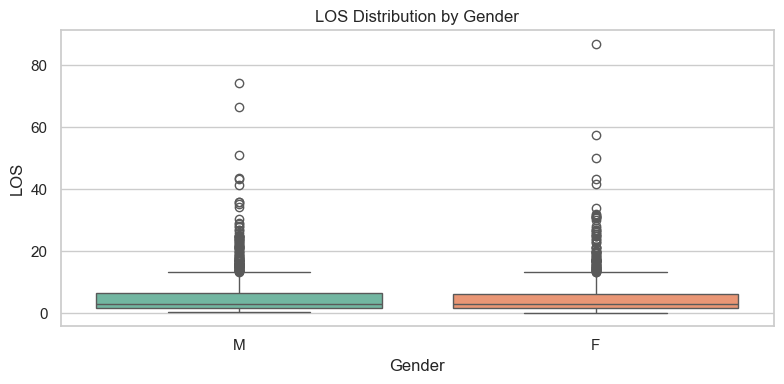

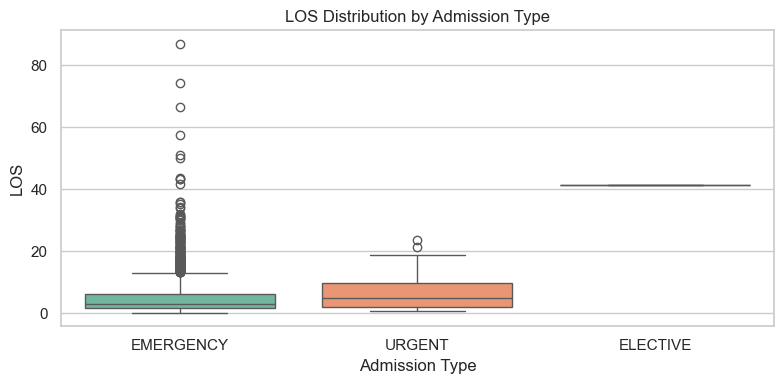

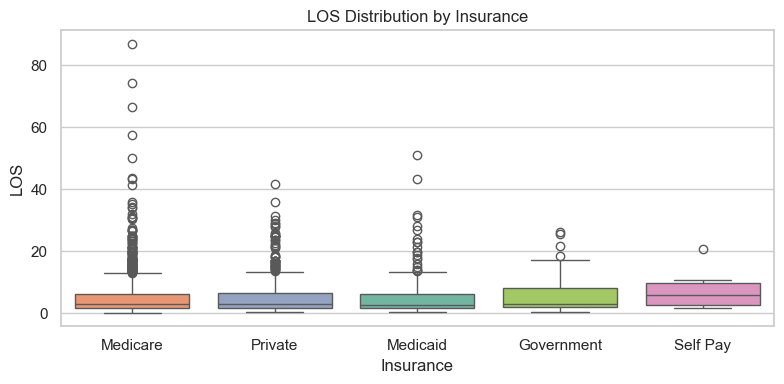

In [ ]:
def plot_boxplot(
    data, x, y, order=None, palette="Set2", title=None, xlabel=None, ylabel=None, save_path=None
):
    plt.figure()
    sns.boxplot(
        data=data,
        x=x,
        y=y,
        order=order,
        palette=palette
    )
    plt.title(title or f"{y} Distribution by {x}")
    plt.xlabel(xlabel or x)
    plt.ylabel(ylabel or y)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

categorical_vars = ["GENDER", "ADMISSION_TYPE", "INSURANCE"]
for var in categorical_vars:
    plot_boxplot(
        data=df_final,
        x=var,
        y="LOS",
        order=df_final[var].value_counts().index if df_final[var].dtype == "O" else None,
        title=f"LOS Distribution by {var.replace('_', ' ').title()}",
        xlabel=var.replace('_', ' ').title(),
        ylabel="LOS",
        save_path=f"{ASSETS_PATH}{var.lower()}_los_boxplot.png"
    )


## Correlation Matrix of Numeric Features
Correlation matrix represents the strength and direction of the linear relationship between pairs of numeric variables. Red shades indicate positive correlations, blue shades indicate negative correlations, and white areas reflect a lack of association. As expected, a perfect autocorrelation is observed for each variable with itself, represented by the red diagonal.

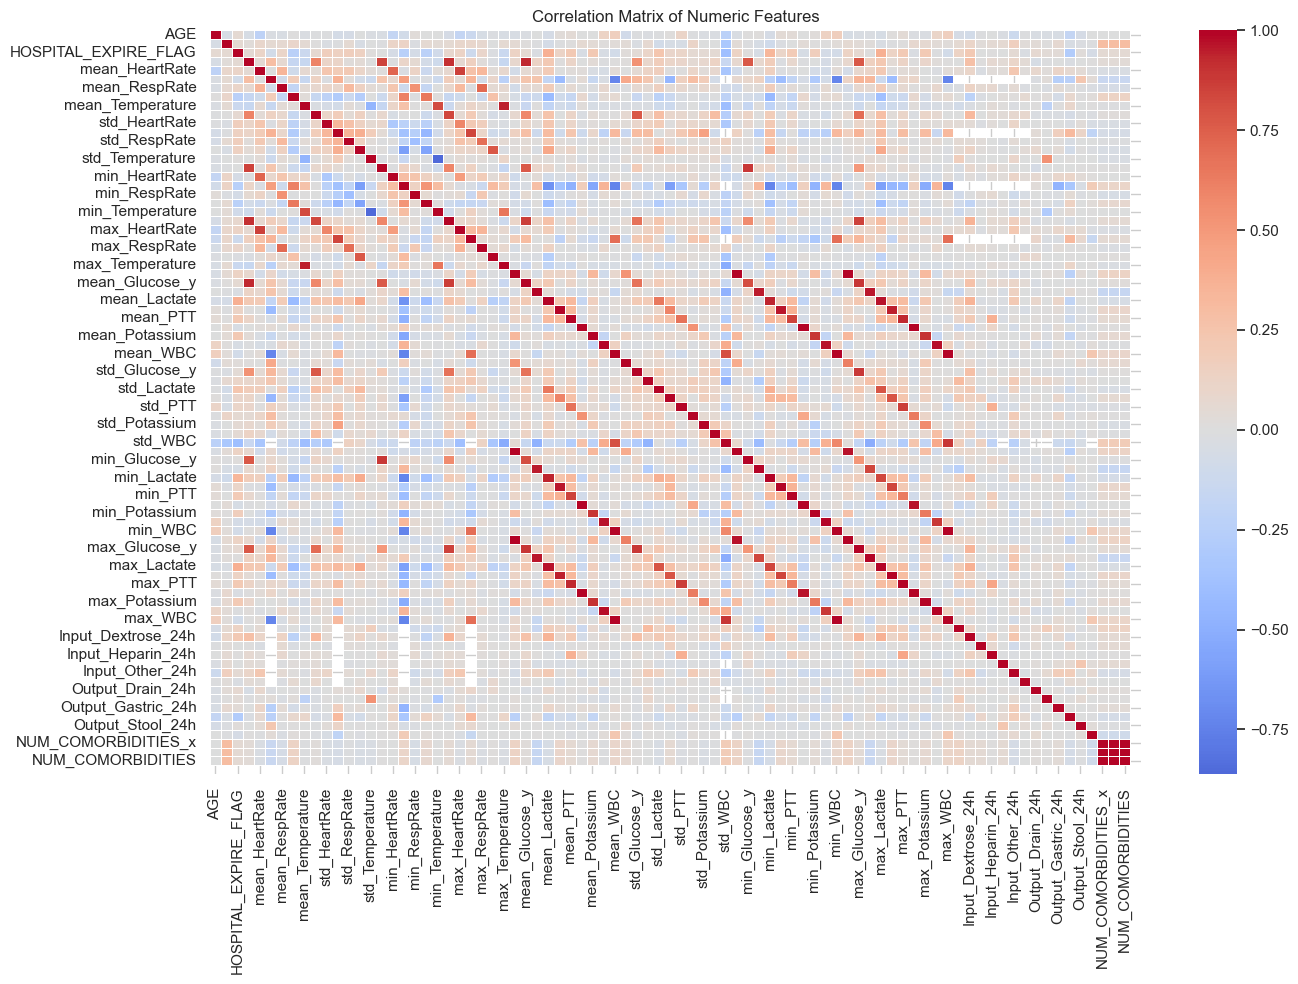

In [127]:
# Compute correlation matrix
numeric_df = df_final.select_dtypes(include=["float64", "int64"]).drop(columns=["SUBJECT_ID", "HADM_ID", "ICUSTAY_ID"])
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

Variables exhibiting very high correlation (ρ > 0.9) may introduce multicollinearity in linear models. For this reason, dimensionality reduction may be warranted by removing redundant features to enhance model stability and interpretability.

In [128]:
high_corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1.0]  # esclude la diagonale
high_corr_pairs[high_corr_pairs > 0.9]

mean_WBC             max_WBC                0.996610
max_WBC              mean_WBC               0.996610
min_WBC              mean_WBC               0.996452
mean_WBC             min_WBC                0.996452
mean_Creatinine      max_Creatinine         0.992286
max_Creatinine       mean_Creatinine        0.992286
max_Platelet Count   mean_Platelet Count    0.991606
mean_Platelet Count  max_Platelet Count     0.991606
                     min_Platelet Count     0.990607
min_Platelet Count   mean_Platelet Count    0.990607
mean_Creatinine      min_Creatinine         0.990463
min_Creatinine       mean_Creatinine        0.990463
min_WBC              max_WBC                0.986150
max_WBC              min_WBC                0.986150
mean_Sodium          max_Sodium             0.971665
max_Sodium           mean_Sodium            0.971665
max_Lactate          mean_Lactate           0.967896
mean_Lactate         max_Lactate            0.967896
max_Creatinine       min_Creatinine         0.

As suspected, the correlation matrix reveals several redundant features: mean_Creatinine and max_Creatinine appear to be interchangeable, capturing highly similar clinical information; mean_Sodium and max_Sodium are near duplicates, suggesting minimal additional value in retaining both; mean_Lactate and max_Lactate show identical trends; thus, using only the mean may be sufficient to represent metabolic stress; mean_PT and min_PT are nearly identical, indicating strong redundancy; mean_Platelet Count and max_Platelet Count reflect overlapping aspects of the same physiological parameter.

Given this redundancy, it is advisable to perform feature selection or dimensionality reduction to eliminate duplicative variables. This step can improve model efficiency, reduce overfitting risk, and mitigate multicollinearity in linear algorithms.

In [129]:
vars_to_drop = [
    'max_Creatinine', 'min_Creatinine',
    'max_Sodium', 'min_Sodium',
    'max_Lactate', 'min_Lactate',
    'max_Platelet Count', 'min_Platelet Count',
    'max_PT', 'min_PT',
    'max_PTT', 'min_PTT',
    'max_Hemoglobin', 'min_Hemoglobin',
    'max_Glucose_x', 'max_Glucose_y',
    'mean_Glucose_y', 'mean_Glucose_x',
    'max_Temperature', 'std_Temperature',
    'max_HeartRate', 'std_HeartRate'
]

# Only drop columns that actually exist in the dataframe
cols_to_drop = [col for col in vars_to_drop if col in df_final.columns]
df_final.drop(columns=cols_to_drop, inplace=True)

In [130]:
display(df_final.head())
df_final.shape
# Save the cleaned DataFrame
df_final.to_csv(EXPORT_PATH + "df_model_ready_cleaned.csv", index=False)

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,AGE,GENDER,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,FIRST_CAREUNIT,LOS,...,Output_Emesis_24h,Output_Gastric_24h,Output_Other_24h,Output_Stool_24h,Output_Urine_24h,NUM_COMORBIDITIES_x,NUM_COMORBIDITIES_y,NUM_COMORBIDITIES,age_censored,COMORBIDITY_CLASS
0,269,106296,206613,40,M,EMERGENCY,EMERGENCY ROOM ADMIT,Medicaid,MICU,3.2788,...,0.0,0.0,0.0,0.0,3850.0,8,8,8,0,Low
1,275,129886,219649,82,M,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,CCU,7.1314,...,0.0,0.0,200.0,0.0,1370.0,15,15,15,0,Moderate
2,292,179726,222505,57,F,URGENT,TRANSFER FROM HOSP/EXTRAM,Private,MICU,0.8854,...,0.0,2230.0,3500.0,0.0,695.0,8,8,8,0,Low
3,305,194340,217232,76,F,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,SICU,2.4370,...,0.0,0.0,1240.0,0.0,0.0,16,16,16,0,Moderate
4,323,143334,264375,57,M,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,MICU,3.0252,...,0.0,0.0,700.0,0.0,855.0,11,11,11,0,Moderate
